# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [36]:
df = pd.read_excel('/content/drive/MyDrive/TUGAS Kelas Terakhir/Eksperimen_SML_Prayboy/ac-01_telco_customer_behavior_mock_data.xlsx')
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

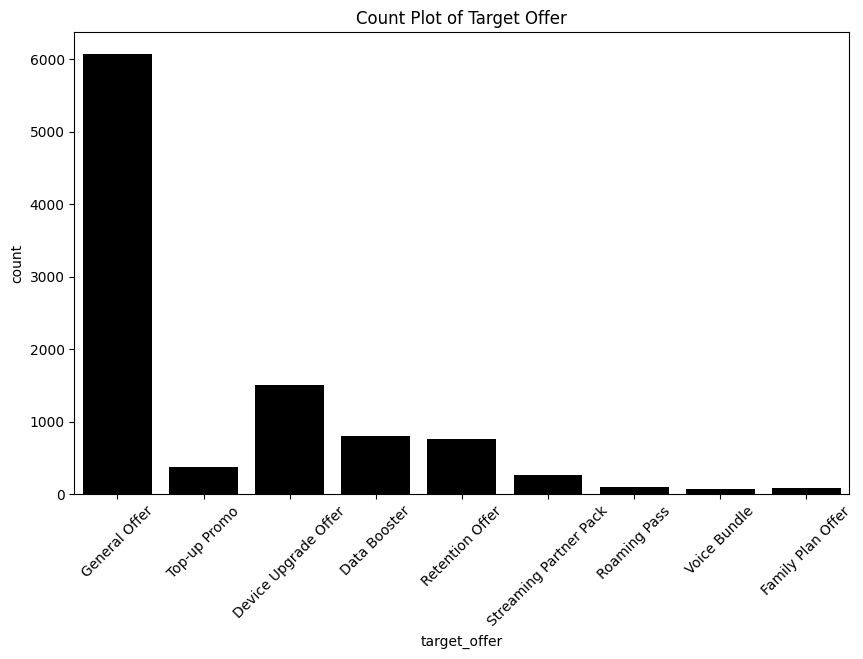

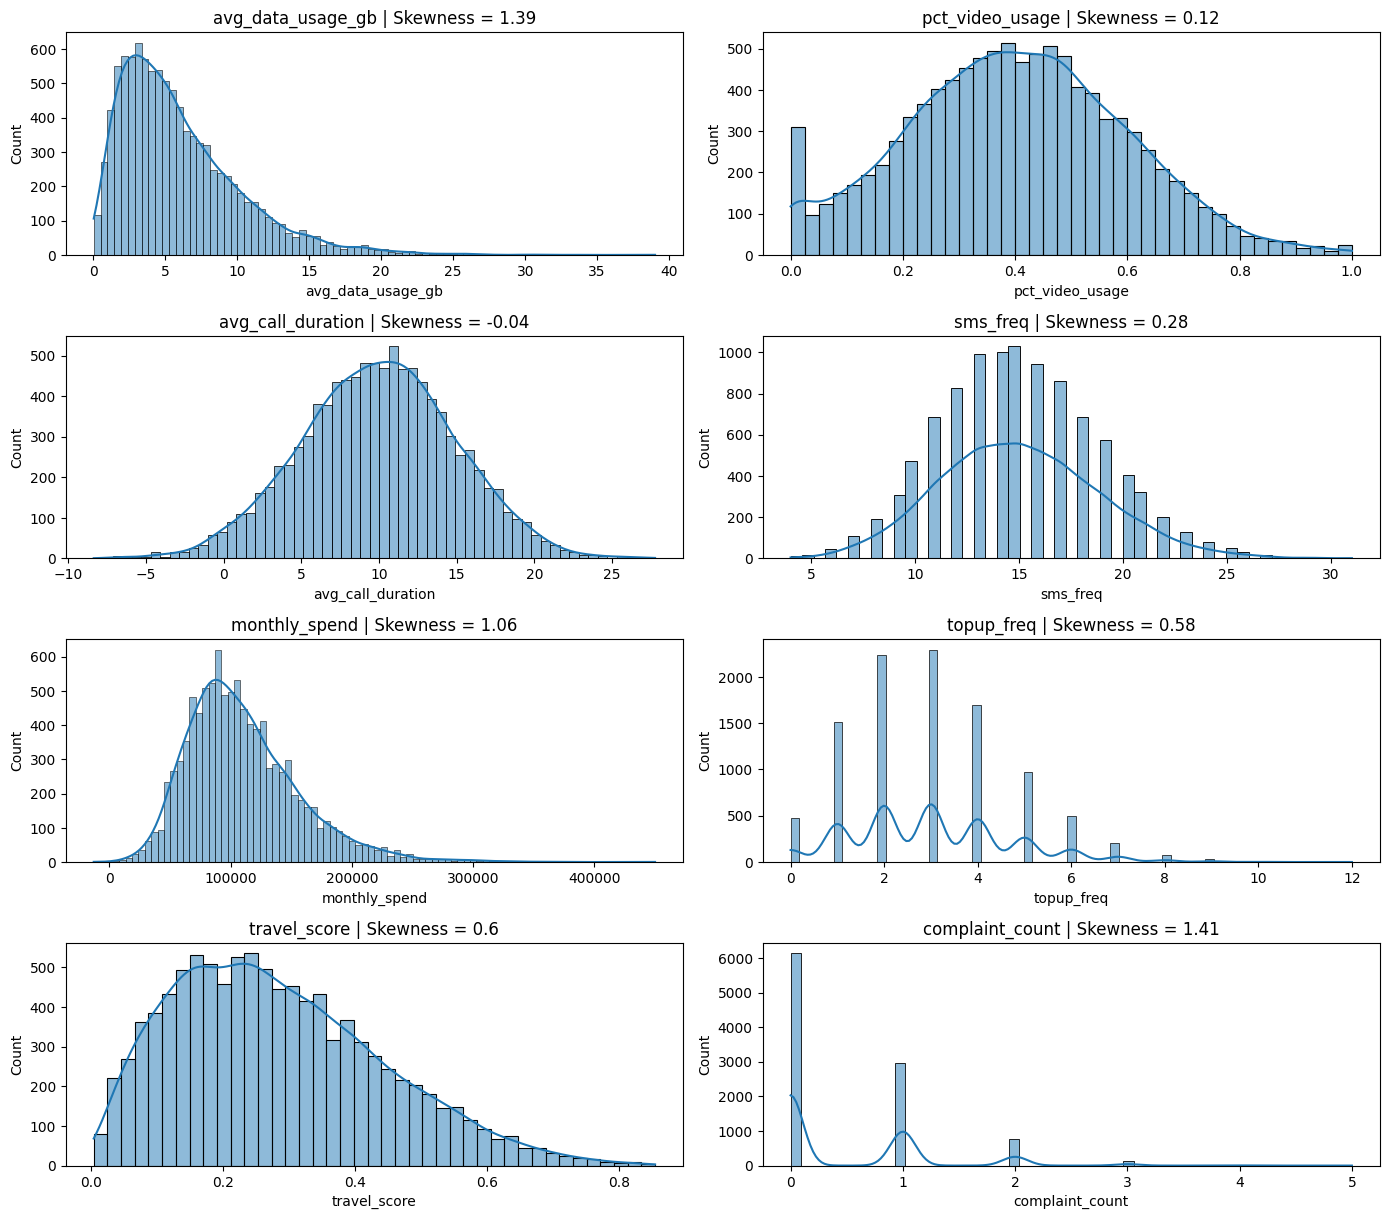

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target_offer', color='black')
plt.title("Count Plot of Target Offer")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, len(numerical_cols) * 3))

for idx, feature in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness = {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()




# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [38]:
categorical_cols = ['plan_type', 'device_brand']
numerical_cols = [
    'avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration',
    'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count'
]

target_col = 'target_offer'
id_col = 'customer_id'

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)
print("Target:", target_col)


Categorical: ['plan_type', 'device_brand']
Numerical: ['avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count']
Target: target_offer


In [39]:
df.shape
df.info()
df.describe().T
df.columns.tolist()
df.nunique()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


,0
customer_id,0
plan_type,0
device_brand,0
avg_data_usage_gb,0
pct_video_usage,0
avg_call_duration,0
sms_freq,0
monthly_spend,0
topup_freq,0
travel_score,0


# **3. Tangani Nilai Negatif Anomali**

In [40]:
df[numerical_cols].min()

,0
avg_data_usage_gb,0.030000
pct_video_usage,0.000000
avg_call_duration,-8.370000
sms_freq,4.000000
monthly_spend,-13000.000000
topup_freq,0.000000
travel_score,0.003376
complaint_count,0.000000


In [41]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
for col in numerical_cols:
    df[col] = df[col].mask(df[col] < 0).fillna(df[col].median())


In [42]:
df[numerical_cols].min()

,0
avg_data_usage_gb,0.030000
pct_video_usage,0.000000
avg_call_duration,0.010000
sms_freq,4.000000
monthly_spend,2000.000000
topup_freq,0.000000
travel_score,0.003376
complaint_count,0.000000


# **4. Outliner**

In [43]:
import pandas as pd
outlier_report = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    outlier_report[col] = {
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outlier Count": len(outliers),
        "Outlier Percentage (%)": round((len(outliers) / len(df)) * 100, 2)
    }

outlier_df = pd.DataFrame(outlier_report).T
print("=== OUTLIER REPORT (IQR METHOD) ===")
display(outlier_df)


=== OUTLIER REPORT (IQR METHOD) ===


,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage (%)
avg_data_usage_gb,-4.885000,15.795000,305.0,3.05
pct_video_usage,-0.139515,0.939967,40.0,0.40
avg_call_duration,-2.436250,22.773750,43.0,0.43
sms_freq,3.000000,27.000000,17.0,0.17
monthly_spend,-7500.000000,220500.000000,249.0,2.49
topup_freq,-1.000000,7.000000,110.0,1.10
travel_score,-0.181546,0.725978,70.0,0.70
complaint_count,-1.500000,2.500000,138.0,1.38


# CELL 8 — LABEL ENCODING

In [46]:
df_label = df.copy()

label_enc = {col: LabelEncoder() for col in categorical_cols + [target_col]}

for col in categorical_cols + [target_col]:
    df_label[col] = label_enc[col].fit_transform(df_label[col])

customer_id_encoder = LabelEncoder()
df_label["customer_id_encoded"] = customer_id_encoder.fit_transform(df_label[id_col])

df_label.head()


,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer,customer_id_encoded
0,C00001,1,3,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,3,0
1,C00002,0,5,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,3,1
2,C00003,0,6,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,3,2
3,C00004,1,0,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,3,3
4,C00005,1,1,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,3,4


# CELL 9 — SCALING NUMERIK

In [47]:
scaler = MinMaxScaler()
df_label[numerical_cols] = scaler.fit_transform(df_label[numerical_cols])

df_label.head()


,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer,customer_id_encoded
0,C00001,1,3,0.037702,0.804146,0.287104,0.333333,0.151786,0.333333,0.330081,0.0,3,0
1,C00002,0,5,0.027186,0.107686,0.344020,0.185185,0.136161,0.250000,0.131202,0.0,3,1
2,C00003,0,6,0.082329,0.313894,0.165706,0.333333,0.194196,0.583333,0.469350,0.0,3,2
3,C00004,1,0,0.135676,0.420158,0.250360,0.148148,0.145089,0.333333,0.350927,0.0,3,3
4,C00005,1,1,0.048217,0.251638,0.396254,0.629630,0.156250,0.416667,0.569079,0.0,3,4


# CELL 10 — ONE HOT ENCODING CATEGORIK

In [48]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

ohe_encoded = ohe.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    ohe_encoded,
    columns=ohe.get_feature_names_out(categorical_cols),
    index=df.index
)

encoded_df.head()


,plan_type_Postpaid,plan_type_Prepaid,device_brand_Apple,device_brand_Huawei,device_brand_Oppo,device_brand_Realme,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_full = df_label.copy()

df_full["plan_type_encoded"] = df_label["plan_type"]
df_full["device_brand_encoded"] = df_label["device_brand"]
df_full["target_offer_encoded"] = df_label["target_offer"]
df_full["customer_id_encoded"] = df_label["customer_id_encoded"]

df_full = pd.concat([df_full, encoded_df], axis=1)

df_full.to_csv("ac-01_telco_customer_behavior_preprocessing.csv", index=False)
print("Versi FULL berhasil disimpan sebagai DATA_PROCESSED_FULL.csv")


Versi FULL berhasil disimpan sebagai DATA_PROCESSED_FULL.csv
